In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
n_sensors = 10
#n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [5]:
x_csv = x_csv.to_numpy(dtype='float32')

In [6]:
x_csv[:, 0:5].shape

(438, 5)

In [7]:
x_5degree = np.concatenate((x_csv[:, 0:5], x_csv[:, 10:15]), axis=1)

In [8]:
x_5degree.shape

(438, 10)

In [9]:
x = x_5degree.reshape((73*6, n_sensors, 1))

In [10]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((73*6, 100, 100))

In [13]:
tsr = x_csv[:, -2]

In [14]:
theta = x_csv[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(394, 100, 100)


In [17]:
print(y_test.shape)

(44, 100, 100)


In [18]:
print(x_train.shape)

(394, 10, 1)


In [19]:
print(x_test.shape)

(44, 10, 1)


In [20]:
theta_train

array([ 40., 165.,  55., 325.,  20., 155.,  90.,  75.,  75., 265.,   0.,
        95., 305., 350., 280.,   5., 245., 100., 185., 330., 325.,  30.,
       125.,   0., 255., 200., 210.,  95., 250., 230., 100., 255.,  65.,
       110., 230.,  85., 130., 215., 300., 285., 320., 120.,  85., 330.,
       230., 205., 155.,  55.,  65., 135., 105.,  40., 320.,  30., 315.,
       265., 270.,  25., 225.,  10., 315.,  60., 280.,  80., 195., 220.,
       220.,  15.,  90., 110., 300., 110., 320., 315., 185., 290., 330.,
       145., 335., 325.,  50., 130.,  35., 150., 160., 175., 130., 215.,
       225., 205., 340., 315., 160., 210., 260., 305., 120., 145., 300.,
       170., 265., 180., 330., 360.,  90.,  80., 165.,  50., 210., 130.,
         5., 295., 110., 230., 245., 115., 235., 140., 310., 245.,  45.,
       220.,  15., 180., 330., 140., 190., 100., 170., 295., 190., 250.,
       310.,  30., 120.,  50.,  60.,  20., 155.,  50.,  60., 150.,  40.,
       150., 275., 105., 225., 200., 150.,  60., 32

In [21]:
tsr_train

array([1.7, 1.5, 1.7, 1.9, 1.6, 1.8, 2. , 1.5, 2. , 1.6, 1.5, 1.5, 1.8,
       1.8, 1.5, 1.8, 1.9, 1.6, 1.9, 1.8, 1.8, 2. , 1.5, 2. , 2. , 1.6,
       1.5, 1.7, 2. , 2. , 1.9, 1.6, 1.9, 1.5, 1.5, 1.6, 1.8, 1.6, 2. ,
       1.5, 1.6, 1.5, 1.5, 1.5, 1.8, 2. , 1.5, 1.6, 2. , 1.7, 1.6, 1.8,
       2. , 1.7, 1.9, 1.8, 2. , 1.5, 1.5, 1.7, 2. , 2. , 1.8, 1.5, 2. ,
       1.6, 2. , 1.5, 1.5, 1.7, 1.5, 1.9, 1.9, 1.5, 1.6, 1.8, 1.9, 1.5,
       1.6, 1.7, 1.8, 1.5, 1.5, 1.7, 2. , 1.6, 1.9, 2. , 1.6, 1.6, 1.6,
       1.7, 1.9, 1.9, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.6,
       1.8, 2. , 2. , 1.6, 2. , 1.7, 1.6, 1.9, 2. , 1.6, 2. , 2. , 1.7,
       1.8, 1.8, 1.7, 1.9, 1.9, 1.8, 1.5, 1.6, 1.9, 1.7, 1.8, 1.8, 1.5,
       1.6, 1.7, 1.7, 1.5, 1.9, 1.9, 1.7, 1.7, 1.7, 1.5, 1.8, 1.6, 1.6,
       1.8, 1.8, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.7, 1.7,
       1.7, 1.5, 1.6, 1.5, 2. , 1.6, 1.9, 1.6, 1.6, 1.9, 1.8, 1.6, 2. ,
       1.5, 1.5, 1.5, 1.6, 1.6, 2. , 1.7, 1.7, 1.5, 2. , 1.8, 2.

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [24]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 10)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               5632      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [25]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 6ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 2/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1035
Epoch 3/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.1026
Epoch 4/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.1011
Epoch 5/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0097 - rmse: 0.0978
Epoch 6/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0085 - rmse: 0.0912
Epoch 7/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0076 - rmse: 0.0862
Epoch 8/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0843
Epoch 9/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0837
Epoch 10/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0464
Epoch 85/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0461
Epoch 86/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0457
Epoch 87/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0454
Epoch 88/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0449
Epoch 89/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0446
Epoch 90/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0442
Epoch 91/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0438
Epoch 92/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0434
Epoch 93/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0430
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 6ms/step - loss: 7.7038e-04 - rmse: 0.0246
Epoch 167/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5992e-04 - rmse: 0.0244
Epoch 168/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4947e-04 - rmse: 0.0242
Epoch 169/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4020e-04 - rmse: 0.0240
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3278e-04 - rmse: 0.0238
Epoch 171/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2729e-04 - rmse: 0.0237
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1731e-04 - rmse: 0.0235
Epoch 173/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0891e-04 - rmse: 0.0233
Epoch 174/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0266e-04 - rmse: 0.0232
Epoch 175/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9019e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 4.0864e-04 - rmse: 0.0156
Epoch 246/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0793e-04 - rmse: 0.0156
Epoch 247/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0543e-04 - rmse: 0.0155
Epoch 248/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0415e-04 - rmse: 0.0155
Epoch 249/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0314e-04 - rmse: 0.0154
Epoch 250/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9933e-04 - rmse: 0.0153
Epoch 251/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9843e-04 - rmse: 0.0153
Epoch 252/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9582e-04 - rmse: 0.0152
Epoch 253/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9168e-04 - rmse: 0.0151
Epoch 254/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8872e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.9373e-04 - rmse: 0.0115
Epoch 325/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9417e-04 - rmse: 0.0115
Epoch 326/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9211e-04 - rmse: 0.0115
Epoch 327/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9036e-04 - rmse: 0.0114
Epoch 328/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8980e-04 - rmse: 0.0114
Epoch 329/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8803e-04 - rmse: 0.0113
Epoch 330/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8670e-04 - rmse: 0.0112
Epoch 331/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8699e-04 - rmse: 0.0112
Epoch 332/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8596e-04 - rmse: 0.0112
Epoch 333/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8724e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.3864e-04 - rmse: 0.0091
Epoch 404/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3564e-04 - rmse: 0.0089
Epoch 405/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3606e-04 - rmse: 0.0090
Epoch 406/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3503e-04 - rmse: 0.0089
Epoch 407/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3348e-04 - rmse: 0.0088
Epoch 408/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3322e-04 - rmse: 0.0088
Epoch 409/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3247e-04 - rmse: 0.0088
Epoch 410/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3241e-04 - rmse: 0.0088
Epoch 411/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3289e-04 - rmse: 0.0088
Epoch 412/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3254e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.0156e-04 - rmse: 0.0072
Epoch 483/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0086e-04 - rmse: 0.0071
Epoch 484/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0024e-04 - rmse: 0.0071
Epoch 485/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0125e-04 - rmse: 0.0072
Epoch 486/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0054e-04 - rmse: 0.0071
Epoch 487/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9966e-04 - rmse: 0.0071
Epoch 488/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9983e-04 - rmse: 0.0071
Epoch 489/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9945e-04 - rmse: 0.0071
Epoch 490/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9987e-04 - rmse: 0.0071
Epoch 491/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9971e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.7877e-04 - rmse: 0.0059
Epoch 562/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7887e-04 - rmse: 0.0059
Epoch 563/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7926e-04 - rmse: 0.0059
Epoch 564/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7811e-04 - rmse: 0.0059
Epoch 565/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7769e-04 - rmse: 0.0058
Epoch 566/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7774e-04 - rmse: 0.0058
Epoch 567/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7782e-04 - rmse: 0.0059
Epoch 568/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7769e-04 - rmse: 0.0058
Epoch 569/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7693e-04 - rmse: 0.0058
Epoch 570/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7760e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.6413e-04 - rmse: 0.0052
Epoch 641/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6322e-04 - rmse: 0.0051
Epoch 642/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6276e-04 - rmse: 0.0051
Epoch 643/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6230e-04 - rmse: 0.0050
Epoch 644/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6273e-04 - rmse: 0.0051
Epoch 645/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6236e-04 - rmse: 0.0050
Epoch 646/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6231e-04 - rmse: 0.0050
Epoch 647/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6208e-04 - rmse: 0.0050
Epoch 648/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6161e-04 - rmse: 0.0050
Epoch 649/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6132e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.5078e-04 - rmse: 0.0045
Epoch 720/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5040e-04 - rmse: 0.0045
Epoch 721/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5040e-04 - rmse: 0.0045
Epoch 722/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5073e-04 - rmse: 0.0045
Epoch 723/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5047e-04 - rmse: 0.0045
Epoch 724/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5038e-04 - rmse: 0.0045
Epoch 725/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5020e-04 - rmse: 0.0045
Epoch 726/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4955e-04 - rmse: 0.0044
Epoch 727/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4973e-04 - rmse: 0.0045
Epoch 728/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4930e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.3993e-04 - rmse: 0.0041
Epoch 799/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3976e-04 - rmse: 0.0040
Epoch 800/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3988e-04 - rmse: 0.0041
Epoch 801/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3960e-04 - rmse: 0.0041
Epoch 802/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3928e-04 - rmse: 0.0040
Epoch 803/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3945e-04 - rmse: 0.0041
Epoch 804/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3945e-04 - rmse: 0.0041
Epoch 805/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3936e-04 - rmse: 0.0041
Epoch 806/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3910e-04 - rmse: 0.0040
Epoch 807/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3887e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.3133e-04 - rmse: 0.0038
Epoch 878/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3084e-04 - rmse: 0.0038
Epoch 879/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3057e-04 - rmse: 0.0037
Epoch 880/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3045e-04 - rmse: 0.0037
Epoch 881/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3013e-04 - rmse: 0.0037
Epoch 882/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2995e-04 - rmse: 0.0037
Epoch 883/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2997e-04 - rmse: 0.0037
Epoch 884/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3028e-04 - rmse: 0.0038
Epoch 885/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3041e-04 - rmse: 0.0038
Epoch 886/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3037e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 1.2333e-04 - rmse: 0.0036
Epoch 957/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2269e-04 - rmse: 0.0035
Epoch 958/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2265e-04 - rmse: 0.0035
Epoch 959/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2253e-04 - rmse: 0.0035
Epoch 960/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2246e-04 - rmse: 0.0035
Epoch 961/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2258e-04 - rmse: 0.0036
Epoch 962/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2222e-04 - rmse: 0.0035
Epoch 963/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2223e-04 - rmse: 0.0035
Epoch 964/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2242e-04 - rmse: 0.0036
Epoch 965/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2237e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.1518e-04 - rmse: 0.0033
Epoch 1036/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1525e-04 - rmse: 0.0033
Epoch 1037/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1546e-04 - rmse: 0.0034
Epoch 1038/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1541e-04 - rmse: 0.0034
Epoch 1039/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1521e-04 - rmse: 0.0033
Epoch 1040/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1489e-04 - rmse: 0.0033
Epoch 1041/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1482e-04 - rmse: 0.0033
Epoch 1042/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1480e-04 - rmse: 0.0033
Epoch 1043/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1483e-04 - rmse: 0.0033
Epoch 1044/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.0932e-04 - rmse: 0.0032
Epoch 1114/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0926e-04 - rmse: 0.0032
Epoch 1115/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0910e-04 - rmse: 0.0032
Epoch 1116/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0907e-04 - rmse: 0.0032
Epoch 1117/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0896e-04 - rmse: 0.0032
Epoch 1118/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0882e-04 - rmse: 0.0032
Epoch 1119/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0930e-04 - rmse: 0.0033
Epoch 1120/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0888e-04 - rmse: 0.0032
Epoch 1121/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0896e-04 - rmse: 0.0033
Epoch 1122/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 1.0350e-04 - rmse: 0.0031
Epoch 1192/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0322e-04 - rmse: 0.0031
Epoch 1193/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0313e-04 - rmse: 0.0031
Epoch 1194/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0301e-04 - rmse: 0.0031
Epoch 1195/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0283e-04 - rmse: 0.0030
Epoch 1196/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0295e-04 - rmse: 0.0031
Epoch 1197/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0323e-04 - rmse: 0.0031
Epoch 1198/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0289e-04 - rmse: 0.0031
Epoch 1199/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0292e-04 - rmse: 0.0031
Epoch 1200/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 9.8130e-05 - rmse: 0.0030
Epoch 1270/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8122e-05 - rmse: 0.0030
Epoch 1271/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8426e-05 - rmse: 0.0030
Epoch 1272/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8152e-05 - rmse: 0.0030
Epoch 1273/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7911e-05 - rmse: 0.0030
Epoch 1274/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7576e-05 - rmse: 0.0029
Epoch 1275/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7410e-05 - rmse: 0.0029
Epoch 1276/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7319e-05 - rmse: 0.0029
Epoch 1277/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7244e-05 - rmse: 0.0029
Epoch 1278/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7

10/10 [==============================] - 0s 5ms/step - loss: 9.2874e-05 - rmse: 0.0028
Epoch 1348/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2984e-05 - rmse: 0.0028
Epoch 1349/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3049e-05 - rmse: 0.0029
Epoch 1350/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2888e-05 - rmse: 0.0028
Epoch 1351/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2653e-05 - rmse: 0.0028
Epoch 1352/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2620e-05 - rmse: 0.0028
Epoch 1353/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2864e-05 - rmse: 0.0029
Epoch 1354/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.3499e-05 - rmse: 0.0030
Epoch 1355/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.3505e-05 - rmse: 0.0030
Epoch 1356/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3

10/10 [==============================] - 0s 6ms/step - loss: 8.8728e-05 - rmse: 0.0028
Epoch 1426/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8660e-05 - rmse: 0.0028
Epoch 1427/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8824e-05 - rmse: 0.0028
Epoch 1428/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8510e-05 - rmse: 0.0028
Epoch 1429/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8500e-05 - rmse: 0.0028
Epoch 1430/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8487e-05 - rmse: 0.0028
Epoch 1431/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8269e-05 - rmse: 0.0027
Epoch 1432/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8382e-05 - rmse: 0.0028
Epoch 1433/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8564e-05 - rmse: 0.0028
Epoch 1434/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8

10/10 [==============================] - 0s 5ms/step - loss: 8.4929e-05 - rmse: 0.0027
Epoch 1504/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4602e-05 - rmse: 0.0027
Epoch 1505/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4489e-05 - rmse: 0.0027
Epoch 1506/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4571e-05 - rmse: 0.0027
Epoch 1507/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4589e-05 - rmse: 0.0027
Epoch 1508/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4443e-05 - rmse: 0.0027
Epoch 1509/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4522e-05 - rmse: 0.0027
Epoch 1510/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4319e-05 - rmse: 0.0027
Epoch 1511/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4157e-05 - rmse: 0.0027
Epoch 1512/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4

10/10 [==============================] - 0s 5ms/step - loss: 8.0747e-05 - rmse: 0.0026
Epoch 1582/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0935e-05 - rmse: 0.0026
Epoch 1583/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1318e-05 - rmse: 0.0027
Epoch 1584/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1377e-05 - rmse: 0.0027
Epoch 1585/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1096e-05 - rmse: 0.0027
Epoch 1586/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0848e-05 - rmse: 0.0026
Epoch 1587/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0777e-05 - rmse: 0.0026
Epoch 1588/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0783e-05 - rmse: 0.0026
Epoch 1589/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0863e-05 - rmse: 0.0027
Epoch 1590/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0

10/10 [==============================] - 0s 5ms/step - loss: 7.7621e-05 - rmse: 0.0026
Epoch 1660/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7507e-05 - rmse: 0.0025
Epoch 1661/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7359e-05 - rmse: 0.0025
Epoch 1662/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7347e-05 - rmse: 0.0025
Epoch 1663/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7585e-05 - rmse: 0.0026
Epoch 1664/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7758e-05 - rmse: 0.0026
Epoch 1665/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7417e-05 - rmse: 0.0026
Epoch 1666/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7246e-05 - rmse: 0.0025
Epoch 1667/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7092e-05 - rmse: 0.0025
Epoch 1668/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7

10/10 [==============================] - 0s 5ms/step - loss: 7.4343e-05 - rmse: 0.0025
Epoch 1738/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4187e-05 - rmse: 0.0024
Epoch 1739/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4233e-05 - rmse: 0.0025
Epoch 1740/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4481e-05 - rmse: 0.0025
Epoch 1741/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4382e-05 - rmse: 0.0025
Epoch 1742/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4227e-05 - rmse: 0.0025
Epoch 1743/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4155e-05 - rmse: 0.0025
Epoch 1744/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4501e-05 - rmse: 0.0026
Epoch 1745/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4604e-05 - rmse: 0.0026
Epoch 1746/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4

10/10 [==============================] - 0s 5ms/step - loss: 7.2094e-05 - rmse: 0.0025
Epoch 1816/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1875e-05 - rmse: 0.0025
Epoch 1817/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1635e-05 - rmse: 0.0025
Epoch 1818/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1783e-05 - rmse: 0.0025
Epoch 1819/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2010e-05 - rmse: 0.0026
Epoch 1820/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1762e-05 - rmse: 0.0025
Epoch 1821/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1657e-05 - rmse: 0.0025
Epoch 1822/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1579e-05 - rmse: 0.0025
Epoch 1823/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1248e-05 - rmse: 0.0024
Epoch 1824/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1

10/10 [==============================] - 0s 6ms/step - loss: 6.9365e-05 - rmse: 0.0025
Epoch 1894/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9140e-05 - rmse: 0.0024
Epoch 1895/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8957e-05 - rmse: 0.0024
Epoch 1896/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8952e-05 - rmse: 0.0024
Epoch 1897/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9277e-05 - rmse: 0.0025
Epoch 1898/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9125e-05 - rmse: 0.0025
Epoch 1899/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8841e-05 - rmse: 0.0024
Epoch 1900/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8739e-05 - rmse: 0.0024
Epoch 1901/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8709e-05 - rmse: 0.0024
Epoch 1902/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8

10/10 [==============================] - 0s 6ms/step - loss: 6.7922e-05 - rmse: 0.0026
Epoch 1972/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7278e-05 - rmse: 0.0025
Epoch 1973/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7273e-05 - rmse: 0.0025
Epoch 1974/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6970e-05 - rmse: 0.0025
Epoch 1975/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6538e-05 - rmse: 0.0024
Epoch 1976/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6346e-05 - rmse: 0.0023
Epoch 1977/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6163e-05 - rmse: 0.0023
Epoch 1978/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6041e-05 - rmse: 0.0023
Epoch 1979/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6118e-05 - rmse: 0.0023
Epoch 1980/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6

10/10 [==============================] - 0s 5ms/step - loss: 6.4241e-05 - rmse: 0.0023
Epoch 2050/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4285e-05 - rmse: 0.0023
Epoch 2051/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4344e-05 - rmse: 0.0023
Epoch 2052/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4006e-05 - rmse: 0.0023
Epoch 2053/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4153e-05 - rmse: 0.0023
Epoch 2054/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4347e-05 - rmse: 0.0024
Epoch 2055/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4788e-05 - rmse: 0.0025
Epoch 2056/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4339e-05 - rmse: 0.0024
Epoch 2057/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4361e-05 - rmse: 0.0024
Epoch 2058/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4

10/10 [==============================] - 0s 5ms/step - loss: 6.2631e-05 - rmse: 0.0024
Epoch 2128/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2477e-05 - rmse: 0.0023
Epoch 2129/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2298e-05 - rmse: 0.0023
Epoch 2130/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2183e-05 - rmse: 0.0023
Epoch 2131/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1958e-05 - rmse: 0.0022
Epoch 2132/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1790e-05 - rmse: 0.0022
Epoch 2133/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1775e-05 - rmse: 0.0022
Epoch 2134/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1989e-05 - rmse: 0.0023
Epoch 2135/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2101e-05 - rmse: 0.0023
Epoch 2136/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2

10/10 [==============================] - 0s 5ms/step - loss: 6.0728e-05 - rmse: 0.0023
Epoch 2206/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0600e-05 - rmse: 0.0023
Epoch 2207/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0783e-05 - rmse: 0.0024
Epoch 2208/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0528e-05 - rmse: 0.0023
Epoch 2209/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0160e-05 - rmse: 0.0022
Epoch 2210/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0362e-05 - rmse: 0.0023
Epoch 2211/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0402e-05 - rmse: 0.0023
Epoch 2212/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0134e-05 - rmse: 0.0022
Epoch 2213/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0201e-05 - rmse: 0.0023
Epoch 2214/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 6ms/step - loss: 5.8705e-05 - rmse: 0.0023
Epoch 2284/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8405e-05 - rmse: 0.0022
Epoch 2285/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8514e-05 - rmse: 0.0022
Epoch 2286/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8556e-05 - rmse: 0.0022
Epoch 2287/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8457e-05 - rmse: 0.0022
Epoch 2288/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8500e-05 - rmse: 0.0022
Epoch 2289/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8317e-05 - rmse: 0.0022
Epoch 2290/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8260e-05 - rmse: 0.0022
Epoch 2291/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8313e-05 - rmse: 0.0022
Epoch 2292/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 6ms/step - loss: 5.6928e-05 - rmse: 0.0022
Epoch 2362/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7000e-05 - rmse: 0.0022
Epoch 2363/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6797e-05 - rmse: 0.0022
Epoch 2364/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6754e-05 - rmse: 0.0022
Epoch 2365/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6628e-05 - rmse: 0.0022
Epoch 2366/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6859e-05 - rmse: 0.0022
Epoch 2367/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6832e-05 - rmse: 0.0022
Epoch 2368/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6706e-05 - rmse: 0.0022
Epoch 2369/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6689e-05 - rmse: 0.0022
Epoch 2370/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6

10/10 [==============================] - 0s 6ms/step - loss: 5.5499e-05 - rmse: 0.0022
Epoch 2440/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5629e-05 - rmse: 0.0022
Epoch 2441/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5459e-05 - rmse: 0.0022
Epoch 2442/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5300e-05 - rmse: 0.0022
Epoch 2443/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5262e-05 - rmse: 0.0022
Epoch 2444/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5156e-05 - rmse: 0.0022
Epoch 2445/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5587e-05 - rmse: 0.0023
Epoch 2446/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5684e-05 - rmse: 0.0023
Epoch 2447/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5551e-05 - rmse: 0.0023
Epoch 2448/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 6ms/step - loss: 5.3635e-05 - rmse: 0.0021
Epoch 2518/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3650e-05 - rmse: 0.0021
Epoch 2519/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3894e-05 - rmse: 0.0022
Epoch 2520/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3733e-05 - rmse: 0.0021
Epoch 2521/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3730e-05 - rmse: 0.0021
Epoch 2522/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3924e-05 - rmse: 0.0022
Epoch 2523/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3903e-05 - rmse: 0.0022
Epoch 2524/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4003e-05 - rmse: 0.0022
Epoch 2525/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4048e-05 - rmse: 0.0022
Epoch 2526/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4

10/10 [==============================] - 0s 5ms/step - loss: 5.2747e-05 - rmse: 0.0022
Epoch 2596/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2388e-05 - rmse: 0.0021
Epoch 2597/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2329e-05 - rmse: 0.0021
Epoch 2598/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2437e-05 - rmse: 0.0021
Epoch 2599/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2461e-05 - rmse: 0.0021
Epoch 2600/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2297e-05 - rmse: 0.0021
Epoch 2601/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2264e-05 - rmse: 0.0021
Epoch 2602/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2227e-05 - rmse: 0.0021
Epoch 2603/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2293e-05 - rmse: 0.0021
Epoch 2604/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2

10/10 [==============================] - 0s 5ms/step - loss: 5.1247e-05 - rmse: 0.0021
Epoch 2674/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1428e-05 - rmse: 0.0022
Epoch 2675/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1398e-05 - rmse: 0.0021
Epoch 2676/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1576e-05 - rmse: 0.0022
Epoch 2677/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1552e-05 - rmse: 0.0022
Epoch 2678/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1390e-05 - rmse: 0.0022
Epoch 2679/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1241e-05 - rmse: 0.0021
Epoch 2680/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1352e-05 - rmse: 0.0022
Epoch 2681/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1543e-05 - rmse: 0.0022
Epoch 2682/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1

10/10 [==============================] - 0s 6ms/step - loss: 5.0021e-05 - rmse: 0.0021
Epoch 2752/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9977e-05 - rmse: 0.0021
Epoch 2753/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0014e-05 - rmse: 0.0021
Epoch 2754/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9904e-05 - rmse: 0.0021
Epoch 2755/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9902e-05 - rmse: 0.0021
Epoch 2756/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9726e-05 - rmse: 0.0020
Epoch 2757/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0282e-05 - rmse: 0.0022
Epoch 2758/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0005e-05 - rmse: 0.0021
Epoch 2759/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0278e-05 - rmse: 0.0022
Epoch 2760/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0

10/10 [==============================] - 0s 5ms/step - loss: 4.9324e-05 - rmse: 0.0022
Epoch 2830/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8954e-05 - rmse: 0.0021
Epoch 2831/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8847e-05 - rmse: 0.0021
Epoch 2832/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8886e-05 - rmse: 0.0021
Epoch 2833/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8797e-05 - rmse: 0.0021
Epoch 2834/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8803e-05 - rmse: 0.0021
Epoch 2835/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8787e-05 - rmse: 0.0021
Epoch 2836/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9275e-05 - rmse: 0.0022
Epoch 2837/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9337e-05 - rmse: 0.0022
Epoch 2838/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9

10/10 [==============================] - 0s 6ms/step - loss: 4.7737e-05 - rmse: 0.0020
Epoch 2908/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7789e-05 - rmse: 0.0020
Epoch 2909/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7844e-05 - rmse: 0.0020
Epoch 2910/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8280e-05 - rmse: 0.0022
Epoch 2911/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8384e-05 - rmse: 0.0022
Epoch 2912/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8343e-05 - rmse: 0.0022
Epoch 2913/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8449e-05 - rmse: 0.0022
Epoch 2914/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8639e-05 - rmse: 0.0022
Epoch 2915/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9157e-05 - rmse: 0.0024
Epoch 2916/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9

10/10 [==============================] - 0s 6ms/step - loss: 4.7179e-05 - rmse: 0.0021
Epoch 2986/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6881e-05 - rmse: 0.0020
Epoch 2987/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6649e-05 - rmse: 0.0020
Epoch 2988/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6739e-05 - rmse: 0.0020
Epoch 2989/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6951e-05 - rmse: 0.0021
Epoch 2990/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7136e-05 - rmse: 0.0021
Epoch 2991/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7721e-05 - rmse: 0.0022
Epoch 2992/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7490e-05 - rmse: 0.0022
Epoch 2993/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7476e-05 - rmse: 0.0022
Epoch 2994/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7

10/10 [==============================] - 0s 6ms/step - loss: 4.6405e-05 - rmse: 0.0021
Epoch 3064/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5922e-05 - rmse: 0.0020
Epoch 3065/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5848e-05 - rmse: 0.0020
Epoch 3066/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5752e-05 - rmse: 0.0020
Epoch 3067/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6171e-05 - rmse: 0.0021
Epoch 3068/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6790e-05 - rmse: 0.0022
Epoch 3069/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6679e-05 - rmse: 0.0022
Epoch 3070/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6300e-05 - rmse: 0.0021
Epoch 3071/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6116e-05 - rmse: 0.0021
Epoch 3072/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5

10/10 [==============================] - 0s 6ms/step - loss: 4.4762e-05 - rmse: 0.0019
Epoch 3142/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4893e-05 - rmse: 0.0019
Epoch 3143/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4756e-05 - rmse: 0.0019
Epoch 3144/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4789e-05 - rmse: 0.0019
Epoch 3145/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5000e-05 - rmse: 0.0020
Epoch 3146/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4894e-05 - rmse: 0.0020
Epoch 3147/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4838e-05 - rmse: 0.0019
Epoch 3148/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4874e-05 - rmse: 0.0020
Epoch 3149/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5130e-05 - rmse: 0.0020
Epoch 3150/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5

10/10 [==============================] - 0s 5ms/step - loss: 4.5014e-05 - rmse: 0.0022
Epoch 3220/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4651e-05 - rmse: 0.0021
Epoch 3221/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4359e-05 - rmse: 0.0020
Epoch 3222/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4330e-05 - rmse: 0.0020
Epoch 3223/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4150e-05 - rmse: 0.0020
Epoch 3224/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3994e-05 - rmse: 0.0019
Epoch 3225/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3941e-05 - rmse: 0.0019
Epoch 3226/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4023e-05 - rmse: 0.0019
Epoch 3227/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4015e-05 - rmse: 0.0019
Epoch 3228/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3

10/10 [==============================] - 0s 5ms/step - loss: 4.3571e-05 - rmse: 0.0020
Epoch 3298/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3653e-05 - rmse: 0.0020
Epoch 3299/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3671e-05 - rmse: 0.0020
Epoch 3300/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3614e-05 - rmse: 0.0020
Epoch 3301/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3352e-05 - rmse: 0.0019
Epoch 3302/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3342e-05 - rmse: 0.0019
Epoch 3303/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3284e-05 - rmse: 0.0019
Epoch 3304/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3544e-05 - rmse: 0.0020
Epoch 3305/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3823e-05 - rmse: 0.0021
Epoch 3306/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3

10/10 [==============================] - 0s 5ms/step - loss: 4.2913e-05 - rmse: 0.0020
Epoch 3376/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3095e-05 - rmse: 0.0020
Epoch 3377/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3246e-05 - rmse: 0.0021
Epoch 3378/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3123e-05 - rmse: 0.0021
Epoch 3379/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2959e-05 - rmse: 0.0020
Epoch 3380/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2836e-05 - rmse: 0.0020
Epoch 3381/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2688e-05 - rmse: 0.0020
Epoch 3382/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2879e-05 - rmse: 0.0020
Epoch 3383/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2979e-05 - rmse: 0.0020
Epoch 3384/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2

10/10 [==============================] - 0s 5ms/step - loss: 4.2029e-05 - rmse: 0.0019
Epoch 3454/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2059e-05 - rmse: 0.0019
Epoch 3455/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2346e-05 - rmse: 0.0020
Epoch 3456/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1996e-05 - rmse: 0.0019
Epoch 3457/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1932e-05 - rmse: 0.0019
Epoch 3458/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1978e-05 - rmse: 0.0019
Epoch 3459/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2094e-05 - rmse: 0.0020
Epoch 3460/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1951e-05 - rmse: 0.0019
Epoch 3461/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.1712e-05 - rmse: 0.0019
Epoch 3462/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1

10/10 [==============================] - 0s 5ms/step - loss: 4.1247e-05 - rmse: 0.0019
Epoch 3532/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1364e-05 - rmse: 0.0019
Epoch 3533/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1400e-05 - rmse: 0.0019
Epoch 3534/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1514e-05 - rmse: 0.0020
Epoch 3535/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1240e-05 - rmse: 0.0019
Epoch 3536/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1375e-05 - rmse: 0.0019
Epoch 3537/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1309e-05 - rmse: 0.0019
Epoch 3538/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1278e-05 - rmse: 0.0019
Epoch 3539/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.1223e-05 - rmse: 0.0019
Epoch 3540/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1

10/10 [==============================] - 0s 5ms/step - loss: 4.1111e-05 - rmse: 0.0020
Epoch 3610/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1027e-05 - rmse: 0.0020
Epoch 3611/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0928e-05 - rmse: 0.0020
Epoch 3612/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1004e-05 - rmse: 0.0020
Epoch 3613/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0902e-05 - rmse: 0.0020
Epoch 3614/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0778e-05 - rmse: 0.0019
Epoch 3615/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0650e-05 - rmse: 0.0019
Epoch 3616/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0492e-05 - rmse: 0.0019
Epoch 3617/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0530e-05 - rmse: 0.0019
Epoch 3618/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0

10/10 [==============================] - 0s 5ms/step - loss: 4.0812e-05 - rmse: 0.0021
Epoch 3688/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0404e-05 - rmse: 0.0020
Epoch 3689/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0087e-05 - rmse: 0.0019
Epoch 3690/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9987e-05 - rmse: 0.0019
Epoch 3691/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9959e-05 - rmse: 0.0019
Epoch 3692/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0203e-05 - rmse: 0.0019
Epoch 3693/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0701e-05 - rmse: 0.0021
Epoch 3694/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0680e-05 - rmse: 0.0021
Epoch 3695/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0206e-05 - rmse: 0.0019
Epoch 3696/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0

10/10 [==============================] - 0s 6ms/step - loss: 4.0130e-05 - rmse: 0.0020
Epoch 3766/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9914e-05 - rmse: 0.0020
Epoch 3767/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9801e-05 - rmse: 0.0020
Epoch 3768/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9988e-05 - rmse: 0.0020
Epoch 3769/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9448e-05 - rmse: 0.0019
Epoch 3770/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9281e-05 - rmse: 0.0018
Epoch 3771/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9224e-05 - rmse: 0.0018
Epoch 3772/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9302e-05 - rmse: 0.0018
Epoch 3773/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9529e-05 - rmse: 0.0019
Epoch 3774/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0

10/10 [==============================] - 0s 5ms/step - loss: 3.8674e-05 - rmse: 0.0018
Epoch 3844/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8737e-05 - rmse: 0.0018
Epoch 3845/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9124e-05 - rmse: 0.0019
Epoch 3846/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8882e-05 - rmse: 0.0018
Epoch 3847/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9091e-05 - rmse: 0.0019
Epoch 3848/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9367e-05 - rmse: 0.0020
Epoch 3849/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8789e-05 - rmse: 0.0018
Epoch 3850/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8741e-05 - rmse: 0.0018
Epoch 3851/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8716e-05 - rmse: 0.0018
Epoch 3852/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8

10/10 [==============================] - 0s 5ms/step - loss: 3.8544e-05 - rmse: 0.0019
Epoch 3922/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8446e-05 - rmse: 0.0019
Epoch 3923/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8585e-05 - rmse: 0.0019
Epoch 3924/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8742e-05 - rmse: 0.0019
Epoch 3925/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8835e-05 - rmse: 0.0020
Epoch 3926/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8958e-05 - rmse: 0.0020
Epoch 3927/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8753e-05 - rmse: 0.0019
Epoch 3928/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8624e-05 - rmse: 0.0019
Epoch 3929/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8710e-05 - rmse: 0.0019
Epoch 3930/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8

10/10 [==============================] - 0s 5ms/step - loss: 3.7786e-05 - rmse: 0.0018
Epoch 4000/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7738e-05 - rmse: 0.0018
Epoch 4001/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7970e-05 - rmse: 0.0018
Epoch 4002/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8440e-05 - rmse: 0.0020
Epoch 4003/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8262e-05 - rmse: 0.0019
Epoch 4004/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8272e-05 - rmse: 0.0019
Epoch 4005/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8104e-05 - rmse: 0.0019
Epoch 4006/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7902e-05 - rmse: 0.0018
Epoch 4007/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7894e-05 - rmse: 0.0018
Epoch 4008/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7

10/10 [==============================] - 0s 5ms/step - loss: 3.7721e-05 - rmse: 0.0019
Epoch 4078/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7378e-05 - rmse: 0.0018
Epoch 4079/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7272e-05 - rmse: 0.0018
Epoch 4080/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7211e-05 - rmse: 0.0018
Epoch 4081/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7215e-05 - rmse: 0.0018
Epoch 4082/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7434e-05 - rmse: 0.0018
Epoch 4083/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7524e-05 - rmse: 0.0018
Epoch 4084/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7394e-05 - rmse: 0.0018
Epoch 4085/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7268e-05 - rmse: 0.0018
Epoch 4086/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7

10/10 [==============================] - 0s 5ms/step - loss: 3.8573e-05 - rmse: 0.0022
Epoch 4156/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0546e-05 - rmse: 0.0026
Epoch 4157/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2102e-05 - rmse: 0.0029
Epoch 4158/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0210e-05 - rmse: 0.0025
Epoch 4159/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8912e-05 - rmse: 0.0023
Epoch 4160/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8309e-05 - rmse: 0.0021
Epoch 4161/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7995e-05 - rmse: 0.0021
Epoch 4162/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7624e-05 - rmse: 0.0020
Epoch 4163/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7325e-05 - rmse: 0.0019
Epoch 4164/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7

10/10 [==============================] - 0s 5ms/step - loss: 3.6550e-05 - rmse: 0.0018
Epoch 4234/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6370e-05 - rmse: 0.0017
Epoch 4235/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6518e-05 - rmse: 0.0018
Epoch 4236/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6583e-05 - rmse: 0.0018
Epoch 4237/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6689e-05 - rmse: 0.0018
Epoch 4238/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6644e-05 - rmse: 0.0018
Epoch 4239/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6675e-05 - rmse: 0.0018
Epoch 4240/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6683e-05 - rmse: 0.0018
Epoch 4241/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6634e-05 - rmse: 0.0018
Epoch 4242/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6

10/10 [==============================] - 0s 5ms/step - loss: 3.6052e-05 - rmse: 0.0018
Epoch 4312/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5932e-05 - rmse: 0.0017
Epoch 4313/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6147e-05 - rmse: 0.0018
Epoch 4314/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6409e-05 - rmse: 0.0019
Epoch 4315/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6422e-05 - rmse: 0.0019
Epoch 4316/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6182e-05 - rmse: 0.0018
Epoch 4317/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5933e-05 - rmse: 0.0017
Epoch 4318/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5944e-05 - rmse: 0.0017
Epoch 4319/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6054e-05 - rmse: 0.0018
Epoch 4320/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5

10/10 [==============================] - 0s 5ms/step - loss: 3.5956e-05 - rmse: 0.0018
Epoch 4390/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5790e-05 - rmse: 0.0018
Epoch 4391/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5560e-05 - rmse: 0.0017
Epoch 4392/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5469e-05 - rmse: 0.0017
Epoch 4393/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5788e-05 - rmse: 0.0018
Epoch 4394/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5914e-05 - rmse: 0.0018
Epoch 4395/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5722e-05 - rmse: 0.0018
Epoch 4396/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5829e-05 - rmse: 0.0018
Epoch 4397/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6027e-05 - rmse: 0.0019
Epoch 4398/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5

10/10 [==============================] - 0s 5ms/step - loss: 3.5416e-05 - rmse: 0.0018
Epoch 4468/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5468e-05 - rmse: 0.0018
Epoch 4469/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5349e-05 - rmse: 0.0018
Epoch 4470/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5333e-05 - rmse: 0.0018
Epoch 4471/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5779e-05 - rmse: 0.0019
Epoch 4472/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5924e-05 - rmse: 0.0019
Epoch 4473/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5756e-05 - rmse: 0.0019
Epoch 4474/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5826e-05 - rmse: 0.0019
Epoch 4475/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5559e-05 - rmse: 0.0018
Epoch 4476/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5

10/10 [==============================] - 0s 5ms/step - loss: 3.5476e-05 - rmse: 0.0019
Epoch 4546/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5184e-05 - rmse: 0.0018
Epoch 4547/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5314e-05 - rmse: 0.0018
Epoch 4548/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5230e-05 - rmse: 0.0018
Epoch 4549/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5552e-05 - rmse: 0.0019
Epoch 4550/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5607e-05 - rmse: 0.0019
Epoch 4551/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5136e-05 - rmse: 0.0018
Epoch 4552/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5224e-05 - rmse: 0.0018
Epoch 4553/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5171e-05 - rmse: 0.0018
Epoch 4554/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5

10/10 [==============================] - 0s 5ms/step - loss: 3.4427e-05 - rmse: 0.0017
Epoch 4624/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4632e-05 - rmse: 0.0017
Epoch 4625/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4689e-05 - rmse: 0.0018
Epoch 4626/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4885e-05 - rmse: 0.0018
Epoch 4627/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4982e-05 - rmse: 0.0018
Epoch 4628/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4944e-05 - rmse: 0.0018
Epoch 4629/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4665e-05 - rmse: 0.0018
Epoch 4630/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4646e-05 - rmse: 0.0018
Epoch 4631/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4616e-05 - rmse: 0.0017
Epoch 4632/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4

10/10 [==============================] - 0s 5ms/step - loss: 3.4479e-05 - rmse: 0.0018
Epoch 4702/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4217e-05 - rmse: 0.0017
Epoch 4703/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4058e-05 - rmse: 0.0017
Epoch 4704/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4198e-05 - rmse: 0.0017
Epoch 4705/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4430e-05 - rmse: 0.0018
Epoch 4706/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4345e-05 - rmse: 0.0018
Epoch 4707/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4178e-05 - rmse: 0.0017
Epoch 4708/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4242e-05 - rmse: 0.0017
Epoch 4709/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4408e-05 - rmse: 0.0018
Epoch 4710/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4

10/10 [==============================] - 0s 5ms/step - loss: 3.4097e-05 - rmse: 0.0018
Epoch 4780/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4292e-05 - rmse: 0.0018
Epoch 4781/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4603e-05 - rmse: 0.0019
Epoch 4782/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4365e-05 - rmse: 0.0018
Epoch 4783/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4255e-05 - rmse: 0.0018
Epoch 4784/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4065e-05 - rmse: 0.0018
Epoch 4785/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4025e-05 - rmse: 0.0018
Epoch 4786/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4363e-05 - rmse: 0.0018
Epoch 4787/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4251e-05 - rmse: 0.0018
Epoch 4788/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4

10/10 [==============================] - 0s 5ms/step - loss: 3.5110e-05 - rmse: 0.0021
Epoch 4858/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4418e-05 - rmse: 0.0019
Epoch 4859/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4052e-05 - rmse: 0.0018
Epoch 4860/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4155e-05 - rmse: 0.0019
Epoch 4861/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4163e-05 - rmse: 0.0019
Epoch 4862/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3963e-05 - rmse: 0.0018
Epoch 4863/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3956e-05 - rmse: 0.0018
Epoch 4864/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3981e-05 - rmse: 0.0018
Epoch 4865/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3955e-05 - rmse: 0.0018
Epoch 4866/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3

10/10 [==============================] - 0s 5ms/step - loss: 3.3133e-05 - rmse: 0.0016
Epoch 4936/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3407e-05 - rmse: 0.0017
Epoch 4937/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4170e-05 - rmse: 0.0019
Epoch 4938/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4189e-05 - rmse: 0.0019
Epoch 4939/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3824e-05 - rmse: 0.0018
Epoch 4940/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3400e-05 - rmse: 0.0017
Epoch 4941/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3398e-05 - rmse: 0.0017
Epoch 4942/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3354e-05 - rmse: 0.0017
Epoch 4943/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3268e-05 - rmse: 0.0017
Epoch 4944/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3

10/10 [==============================] - 0s 5ms/step - loss: 3.3601e-05 - rmse: 0.0019
Epoch 5014/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3343e-05 - rmse: 0.0018
Epoch 5015/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3450e-05 - rmse: 0.0018
Epoch 5016/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3201e-05 - rmse: 0.0017
Epoch 5017/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3216e-05 - rmse: 0.0018
Epoch 5018/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2941e-05 - rmse: 0.0017
Epoch 5019/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2952e-05 - rmse: 0.0017
Epoch 5020/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3123e-05 - rmse: 0.0017
Epoch 5021/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3523e-05 - rmse: 0.0018
Epoch 5022/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3

10/10 [==============================] - 0s 5ms/step - loss: 3.3359e-05 - rmse: 0.0019
Epoch 5092/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3101e-05 - rmse: 0.0018
Epoch 5093/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3194e-05 - rmse: 0.0018
Epoch 5094/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3103e-05 - rmse: 0.0018
Epoch 5095/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2836e-05 - rmse: 0.0017
Epoch 5096/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2808e-05 - rmse: 0.0017
Epoch 5097/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2941e-05 - rmse: 0.0017
Epoch 5098/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3202e-05 - rmse: 0.0018
Epoch 5099/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3390e-05 - rmse: 0.0019
Epoch 5100/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3

10/10 [==============================] - 0s 6ms/step - loss: 3.2173e-05 - rmse: 0.0016
Epoch 5170/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2480e-05 - rmse: 0.0017
Epoch 5171/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2583e-05 - rmse: 0.0017
Epoch 5172/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2578e-05 - rmse: 0.0017
Epoch 5173/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2482e-05 - rmse: 0.0017
Epoch 5174/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2655e-05 - rmse: 0.0017
Epoch 5175/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2723e-05 - rmse: 0.0018
Epoch 5176/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2408e-05 - rmse: 0.0017
Epoch 5177/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2382e-05 - rmse: 0.0017
Epoch 5178/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2

10/10 [==============================] - 0s 5ms/step - loss: 3.2244e-05 - rmse: 0.0017
Epoch 5248/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2455e-05 - rmse: 0.0017
Epoch 5249/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2424e-05 - rmse: 0.0017
Epoch 5250/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2774e-05 - rmse: 0.0018
Epoch 5251/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3217e-05 - rmse: 0.0020
Epoch 5252/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2828e-05 - rmse: 0.0018
Epoch 5253/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2480e-05 - rmse: 0.0018
Epoch 5254/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2248e-05 - rmse: 0.0017
Epoch 5255/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2428e-05 - rmse: 0.0017
Epoch 5256/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 5ms/step - loss: 3.2254e-05 - rmse: 0.0017
Epoch 5326/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2039e-05 - rmse: 0.0017
Epoch 5327/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1975e-05 - rmse: 0.0017
Epoch 5328/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1745e-05 - rmse: 0.0016
Epoch 5329/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1771e-05 - rmse: 0.0016
Epoch 5330/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1811e-05 - rmse: 0.0016
Epoch 5331/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1815e-05 - rmse: 0.0016
Epoch 5332/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1812e-05 - rmse: 0.0016
Epoch 5333/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1775e-05 - rmse: 0.0016
Epoch 5334/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 6ms/step - loss: 3.1812e-05 - rmse: 0.0017
Epoch 5404/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1740e-05 - rmse: 0.0017
Epoch 5405/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1760e-05 - rmse: 0.0017
Epoch 5406/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1531e-05 - rmse: 0.0016
Epoch 5407/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1501e-05 - rmse: 0.0016
Epoch 5408/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1464e-05 - rmse: 0.0016
Epoch 5409/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1495e-05 - rmse: 0.0016
Epoch 5410/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1409e-05 - rmse: 0.0016
Epoch 5411/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1614e-05 - rmse: 0.0016
Epoch 5412/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 3.2057e-05 - rmse: 0.0018
Epoch 5482/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2053e-05 - rmse: 0.0018
Epoch 5483/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2028e-05 - rmse: 0.0018
Epoch 5484/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1851e-05 - rmse: 0.0018
Epoch 5485/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1570e-05 - rmse: 0.0017
Epoch 5486/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1446e-05 - rmse: 0.0016
Epoch 5487/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1336e-05 - rmse: 0.0016
Epoch 5488/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1410e-05 - rmse: 0.0016
Epoch 5489/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1256e-05 - rmse: 0.0016
Epoch 5490/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1

10/10 [==============================] - 0s 6ms/step - loss: 3.1271e-05 - rmse: 0.0016
Epoch 5560/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1160e-05 - rmse: 0.0016
Epoch 5561/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1127e-05 - rmse: 0.0016
Epoch 5562/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1022e-05 - rmse: 0.0016
Epoch 5563/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1085e-05 - rmse: 0.0016
Epoch 5564/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1208e-05 - rmse: 0.0016
Epoch 5565/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1231e-05 - rmse: 0.0016
Epoch 5566/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1500e-05 - rmse: 0.0017
Epoch 5567/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1432e-05 - rmse: 0.0017
Epoch 5568/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 3.0961e-05 - rmse: 0.0016
Epoch 5638/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1380e-05 - rmse: 0.0017
Epoch 5639/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1313e-05 - rmse: 0.0017
Epoch 5640/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1020e-05 - rmse: 0.0016
Epoch 5641/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0980e-05 - rmse: 0.0016
Epoch 5642/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1087e-05 - rmse: 0.0017
Epoch 5643/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1170e-05 - rmse: 0.0017
Epoch 5644/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0967e-05 - rmse: 0.0016
Epoch 5645/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1120e-05 - rmse: 0.0017
Epoch 5646/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 3.1406e-05 - rmse: 0.0018
Epoch 5716/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1119e-05 - rmse: 0.0017
Epoch 5717/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0927e-05 - rmse: 0.0017
Epoch 5718/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0908e-05 - rmse: 0.0017
Epoch 5719/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1144e-05 - rmse: 0.0017
Epoch 5720/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1125e-05 - rmse: 0.0017
Epoch 5721/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1094e-05 - rmse: 0.0017
Epoch 5722/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1208e-05 - rmse: 0.0017
Epoch 5723/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1594e-05 - rmse: 0.0019
Epoch 5724/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1

10/10 [==============================] - 0s 6ms/step - loss: 3.1377e-05 - rmse: 0.0018
Epoch 5794/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1114e-05 - rmse: 0.0018
Epoch 5795/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1241e-05 - rmse: 0.0018
Epoch 5796/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1449e-05 - rmse: 0.0019
Epoch 5797/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1892e-05 - rmse: 0.0020
Epoch 5798/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1347e-05 - rmse: 0.0018
Epoch 5799/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1625e-05 - rmse: 0.0019
Epoch 5800/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1008e-05 - rmse: 0.0017
Epoch 5801/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1160e-05 - rmse: 0.0018
Epoch 5802/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 3.0389e-05 - rmse: 0.0016
Epoch 5872/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0409e-05 - rmse: 0.0016
Epoch 5873/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0485e-05 - rmse: 0.0016
Epoch 5874/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0279e-05 - rmse: 0.0016
Epoch 5875/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0374e-05 - rmse: 0.0016
Epoch 5876/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0472e-05 - rmse: 0.0016
Epoch 5877/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0312e-05 - rmse: 0.0016
Epoch 5878/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0294e-05 - rmse: 0.0016
Epoch 5879/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0348e-05 - rmse: 0.0016
Epoch 5880/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 3.0073e-05 - rmse: 0.0016
Epoch 5950/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0085e-05 - rmse: 0.0016
Epoch 5951/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0121e-05 - rmse: 0.0016
Epoch 5952/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0245e-05 - rmse: 0.0016
Epoch 5953/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0737e-05 - rmse: 0.0018
Epoch 5954/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0929e-05 - rmse: 0.0018
Epoch 5955/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1002e-05 - rmse: 0.0018
Epoch 5956/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0499e-05 - rmse: 0.0017
Epoch 5957/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0432e-05 - rmse: 0.0017
Epoch 5958/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 3.0496e-05 - rmse: 0.0017
Epoch 6028/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0781e-05 - rmse: 0.0018
Epoch 6029/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0439e-05 - rmse: 0.0017
Epoch 6030/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0119e-05 - rmse: 0.0016
Epoch 6031/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9967e-05 - rmse: 0.0016
Epoch 6032/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0215e-05 - rmse: 0.0017
Epoch 6033/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0241e-05 - rmse: 0.0017
Epoch 6034/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0100e-05 - rmse: 0.0016
Epoch 6035/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0132e-05 - rmse: 0.0016
Epoch 6036/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 5ms/step - loss: 3.0260e-05 - rmse: 0.0017
Epoch 6106/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0526e-05 - rmse: 0.0018
Epoch 6107/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0211e-05 - rmse: 0.0017
Epoch 6108/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0000e-05 - rmse: 0.0016
Epoch 6109/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0213e-05 - rmse: 0.0017
Epoch 6110/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0144e-05 - rmse: 0.0017
Epoch 6111/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0343e-05 - rmse: 0.0018
Epoch 6112/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1339e-05 - rmse: 0.0020
Epoch 6113/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2084e-05 - rmse: 0.0022
Epoch 6114/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 5ms/step - loss: 2.9699e-05 - rmse: 0.0016
Epoch 6184/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9610e-05 - rmse: 0.0016
Epoch 6185/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9817e-05 - rmse: 0.0016
Epoch 6186/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9844e-05 - rmse: 0.0017
Epoch 6187/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0084e-05 - rmse: 0.0017
Epoch 6188/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9787e-05 - rmse: 0.0016
Epoch 6189/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9765e-05 - rmse: 0.0016
Epoch 6190/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9849e-05 - rmse: 0.0017
Epoch 6191/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9788e-05 - rmse: 0.0016
Epoch 6192/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 5ms/step - loss: 2.9570e-05 - rmse: 0.0016
Epoch 6262/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9437e-05 - rmse: 0.0016
Epoch 6263/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9592e-05 - rmse: 0.0016
Epoch 6264/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9897e-05 - rmse: 0.0017
Epoch 6265/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9983e-05 - rmse: 0.0017
Epoch 6266/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0106e-05 - rmse: 0.0018
Epoch 6267/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9762e-05 - rmse: 0.0017
Epoch 6268/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9653e-05 - rmse: 0.0016
Epoch 6269/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0117e-05 - rmse: 0.0018
Epoch 6270/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 3.0185e-05 - rmse: 0.0018
Epoch 6340/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0018e-05 - rmse: 0.0018
Epoch 6341/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0025e-05 - rmse: 0.0018
Epoch 6342/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9781e-05 - rmse: 0.0017
Epoch 6343/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9517e-05 - rmse: 0.0016
Epoch 6344/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9251e-05 - rmse: 0.0016
Epoch 6345/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9126e-05 - rmse: 0.0015
Epoch 6346/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9248e-05 - rmse: 0.0016
Epoch 6347/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9502e-05 - rmse: 0.0016
Epoch 6348/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 5ms/step - loss: 2.9601e-05 - rmse: 0.0017
Epoch 6418/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9233e-05 - rmse: 0.0016
Epoch 6419/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9192e-05 - rmse: 0.0016
Epoch 6420/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9024e-05 - rmse: 0.0015
Epoch 6421/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9237e-05 - rmse: 0.0016
Epoch 6422/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9338e-05 - rmse: 0.0016
Epoch 6423/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9256e-05 - rmse: 0.0016
Epoch 6424/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9284e-05 - rmse: 0.0016
Epoch 6425/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9421e-05 - rmse: 0.0017
Epoch 6426/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 6ms/step - loss: 2.9287e-05 - rmse: 0.0017
Epoch 6496/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9322e-05 - rmse: 0.0017
Epoch 6497/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9227e-05 - rmse: 0.0016
Epoch 6498/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9017e-05 - rmse: 0.0016
Epoch 6499/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8937e-05 - rmse: 0.0016
Epoch 6500/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8826e-05 - rmse: 0.0015
Epoch 6501/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9136e-05 - rmse: 0.0016
Epoch 6502/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9155e-05 - rmse: 0.0016
Epoch 6503/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9109e-05 - rmse: 0.0016
Epoch 6504/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 6ms/step - loss: 2.8931e-05 - rmse: 0.0016
Epoch 6574/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9010e-05 - rmse: 0.0016
Epoch 6575/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9103e-05 - rmse: 0.0016
Epoch 6576/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9180e-05 - rmse: 0.0017
Epoch 6577/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9412e-05 - rmse: 0.0017
Epoch 6578/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9379e-05 - rmse: 0.0017
Epoch 6579/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9613e-05 - rmse: 0.0018
Epoch 6580/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9884e-05 - rmse: 0.0019
Epoch 6581/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9925e-05 - rmse: 0.0019
Epoch 6582/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 5ms/step - loss: 2.9285e-05 - rmse: 0.0017
Epoch 6652/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9012e-05 - rmse: 0.0017
Epoch 6653/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8986e-05 - rmse: 0.0017
Epoch 6654/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8684e-05 - rmse: 0.0016
Epoch 6655/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8813e-05 - rmse: 0.0016
Epoch 6656/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9223e-05 - rmse: 0.0017
Epoch 6657/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9125e-05 - rmse: 0.0017
Epoch 6658/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9225e-05 - rmse: 0.0017
Epoch 6659/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9063e-05 - rmse: 0.0017
Epoch 6660/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 5ms/step - loss: 2.8296e-05 - rmse: 0.0015
Epoch 6730/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8329e-05 - rmse: 0.0015
Epoch 6731/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8201e-05 - rmse: 0.0014
Epoch 6732/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8291e-05 - rmse: 0.0015
Epoch 6733/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8375e-05 - rmse: 0.0015
Epoch 6734/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8325e-05 - rmse: 0.0015
Epoch 6735/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8362e-05 - rmse: 0.0015
Epoch 6736/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8366e-05 - rmse: 0.0015
Epoch 6737/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8318e-05 - rmse: 0.0015
Epoch 6738/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.8836e-05 - rmse: 0.0017
Epoch 6808/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8851e-05 - rmse: 0.0017
Epoch 6809/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8734e-05 - rmse: 0.0017
Epoch 6810/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8633e-05 - rmse: 0.0016
Epoch 6811/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8475e-05 - rmse: 0.0016
Epoch 6812/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8653e-05 - rmse: 0.0016
Epoch 6813/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8647e-05 - rmse: 0.0016
Epoch 6814/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8590e-05 - rmse: 0.0016
Epoch 6815/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8573e-05 - rmse: 0.0016
Epoch 6816/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.8475e-05 - rmse: 0.0016
Epoch 6886/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8279e-05 - rmse: 0.0016
Epoch 6887/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8267e-05 - rmse: 0.0015
Epoch 6888/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8516e-05 - rmse: 0.0016
Epoch 6889/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8614e-05 - rmse: 0.0017
Epoch 6890/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8581e-05 - rmse: 0.0016
Epoch 6891/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8439e-05 - rmse: 0.0016
Epoch 6892/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0058e-05 - rmse: 0.0020
Epoch 6893/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9793e-05 - rmse: 0.0020
Epoch 6894/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 5ms/step - loss: 2.8138e-05 - rmse: 0.0015
Epoch 6964/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8010e-05 - rmse: 0.0015
Epoch 6965/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8042e-05 - rmse: 0.0015
Epoch 6966/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8228e-05 - rmse: 0.0016
Epoch 6967/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8401e-05 - rmse: 0.0016
Epoch 6968/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8175e-05 - rmse: 0.0016
Epoch 6969/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8224e-05 - rmse: 0.0016
Epoch 6970/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8101e-05 - rmse: 0.0015
Epoch 6971/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7913e-05 - rmse: 0.0015
Epoch 6972/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7996e-05 - rmse: 0.0015
Epoch 7042/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8057e-05 - rmse: 0.0016
Epoch 7043/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8320e-05 - rmse: 0.0016
Epoch 7044/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8321e-05 - rmse: 0.0016
Epoch 7045/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8145e-05 - rmse: 0.0016
Epoch 7046/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8397e-05 - rmse: 0.0017
Epoch 7047/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8545e-05 - rmse: 0.0017
Epoch 7048/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8343e-05 - rmse: 0.0017
Epoch 7049/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8482e-05 - rmse: 0.0017
Epoch 7050/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.8150e-05 - rmse: 0.0016
Epoch 7120/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8039e-05 - rmse: 0.0016
Epoch 7121/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7976e-05 - rmse: 0.0016
Epoch 7122/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7975e-05 - rmse: 0.0016
Epoch 7123/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7905e-05 - rmse: 0.0015
Epoch 7124/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7760e-05 - rmse: 0.0015
Epoch 7125/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7778e-05 - rmse: 0.0015
Epoch 7126/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7764e-05 - rmse: 0.0015
Epoch 7127/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7926e-05 - rmse: 0.0016
Epoch 7128/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 6ms/step - loss: 2.8829e-05 - rmse: 0.0018
Epoch 7198/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9023e-05 - rmse: 0.0019
Epoch 7199/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9037e-05 - rmse: 0.0019
Epoch 7200/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8657e-05 - rmse: 0.0018
Epoch 7201/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8460e-05 - rmse: 0.0017
Epoch 7202/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8446e-05 - rmse: 0.0017
Epoch 7203/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8582e-05 - rmse: 0.0018
Epoch 7204/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8069e-05 - rmse: 0.0016
Epoch 7205/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7759e-05 - rmse: 0.0015
Epoch 7206/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7759e-05 - rmse: 0.0016
Epoch 7276/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7809e-05 - rmse: 0.0016
Epoch 7277/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7767e-05 - rmse: 0.0016
Epoch 7278/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7668e-05 - rmse: 0.0015
Epoch 7279/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7611e-05 - rmse: 0.0015
Epoch 7280/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7778e-05 - rmse: 0.0016
Epoch 7281/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7708e-05 - rmse: 0.0016
Epoch 7282/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7683e-05 - rmse: 0.0015
Epoch 7283/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7588e-05 - rmse: 0.0015
Epoch 7284/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7794e-05 - rmse: 0.0016
Epoch 7354/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7786e-05 - rmse: 0.0016
Epoch 7355/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7851e-05 - rmse: 0.0016
Epoch 7356/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7706e-05 - rmse: 0.0016
Epoch 7357/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7859e-05 - rmse: 0.0016
Epoch 7358/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7881e-05 - rmse: 0.0016
Epoch 7359/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7566e-05 - rmse: 0.0015
Epoch 7360/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7424e-05 - rmse: 0.0015
Epoch 7361/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7391e-05 - rmse: 0.0015
Epoch 7362/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7567e-05 - rmse: 0.0016
Epoch 7432/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7390e-05 - rmse: 0.0015
Epoch 7433/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7263e-05 - rmse: 0.0015
Epoch 7434/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7563e-05 - rmse: 0.0016
Epoch 7435/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7755e-05 - rmse: 0.0016
Epoch 7436/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7720e-05 - rmse: 0.0016
Epoch 7437/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7591e-05 - rmse: 0.0016
Epoch 7438/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7788e-05 - rmse: 0.0017
Epoch 7439/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7737e-05 - rmse: 0.0016
Epoch 7440/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7212e-05 - rmse: 0.0015
Epoch 7510/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7228e-05 - rmse: 0.0015
Epoch 7511/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7165e-05 - rmse: 0.0015
Epoch 7512/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7124e-05 - rmse: 0.0015
Epoch 7513/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7115e-05 - rmse: 0.0015
Epoch 7514/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7218e-05 - rmse: 0.0015
Epoch 7515/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7234e-05 - rmse: 0.0015
Epoch 7516/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7353e-05 - rmse: 0.0015
Epoch 7517/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7941e-05 - rmse: 0.0017
Epoch 7518/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7401e-05 - rmse: 0.0016
Epoch 7588/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7377e-05 - rmse: 0.0016
Epoch 7589/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7506e-05 - rmse: 0.0016
Epoch 7590/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7586e-05 - rmse: 0.0016
Epoch 7591/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7546e-05 - rmse: 0.0016
Epoch 7592/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7372e-05 - rmse: 0.0016
Epoch 7593/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7359e-05 - rmse: 0.0016
Epoch 7594/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7283e-05 - rmse: 0.0016
Epoch 7595/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7582e-05 - rmse: 0.0016
Epoch 7596/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.7066e-05 - rmse: 0.0015
Epoch 7666/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7205e-05 - rmse: 0.0016
Epoch 7667/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7119e-05 - rmse: 0.0015
Epoch 7668/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7162e-05 - rmse: 0.0015
Epoch 7669/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7024e-05 - rmse: 0.0015
Epoch 7670/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6858e-05 - rmse: 0.0014
Epoch 7671/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7021e-05 - rmse: 0.0015
Epoch 7672/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7119e-05 - rmse: 0.0015
Epoch 7673/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7057e-05 - rmse: 0.0015
Epoch 7674/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7162e-05 - rmse: 0.0016
Epoch 7744/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7136e-05 - rmse: 0.0016
Epoch 7745/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6993e-05 - rmse: 0.0015
Epoch 7746/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7090e-05 - rmse: 0.0016
Epoch 7747/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7237e-05 - rmse: 0.0016
Epoch 7748/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7179e-05 - rmse: 0.0016
Epoch 7749/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7175e-05 - rmse: 0.0016
Epoch 7750/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7190e-05 - rmse: 0.0016
Epoch 7751/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7500e-05 - rmse: 0.0017
Epoch 7752/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.6961e-05 - rmse: 0.0015
Epoch 7822/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7030e-05 - rmse: 0.0016
Epoch 7823/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6899e-05 - rmse: 0.0015
Epoch 7824/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6917e-05 - rmse: 0.0015
Epoch 7825/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6710e-05 - rmse: 0.0015
Epoch 7826/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6693e-05 - rmse: 0.0015
Epoch 7827/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6702e-05 - rmse: 0.0015
Epoch 7828/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7050e-05 - rmse: 0.0016
Epoch 7829/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7307e-05 - rmse: 0.0017
Epoch 7830/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.6691e-05 - rmse: 0.0015
Epoch 7900/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6551e-05 - rmse: 0.0014
Epoch 7901/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6567e-05 - rmse: 0.0014
Epoch 7902/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6567e-05 - rmse: 0.0014
Epoch 7903/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6562e-05 - rmse: 0.0014
Epoch 7904/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6628e-05 - rmse: 0.0015
Epoch 7905/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6901e-05 - rmse: 0.0016
Epoch 7906/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7037e-05 - rmse: 0.0016
Epoch 7907/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7347e-05 - rmse: 0.0017
Epoch 7908/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.6561e-05 - rmse: 0.0015
Epoch 7978/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6431e-05 - rmse: 0.0014
Epoch 7979/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6659e-05 - rmse: 0.0015
Epoch 7980/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6688e-05 - rmse: 0.0015
Epoch 7981/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6833e-05 - rmse: 0.0016
Epoch 7982/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6833e-05 - rmse: 0.0016
Epoch 7983/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6718e-05 - rmse: 0.0015
Epoch 7984/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6690e-05 - rmse: 0.0015
Epoch 7985/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6859e-05 - rmse: 0.0016
Epoch 7986/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 6ms/step - loss: 2.6654e-05 - rmse: 0.0015
Epoch 8056/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6617e-05 - rmse: 0.0015
Epoch 8057/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6530e-05 - rmse: 0.0015
Epoch 8058/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6580e-05 - rmse: 0.0015
Epoch 8059/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6942e-05 - rmse: 0.0016
Epoch 8060/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6724e-05 - rmse: 0.0016
Epoch 8061/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6718e-05 - rmse: 0.0016
Epoch 8062/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6654e-05 - rmse: 0.0015
Epoch 8063/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6399e-05 - rmse: 0.0014
Epoch 8064/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.7561e-05 - rmse: 0.0018
Epoch 8134/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8795e-05 - rmse: 0.0021
Epoch 8135/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9630e-05 - rmse: 0.0023
Epoch 8136/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7905e-05 - rmse: 0.0019
Epoch 8137/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7391e-05 - rmse: 0.0018
Epoch 8138/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7616e-05 - rmse: 0.0018
Epoch 8139/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7342e-05 - rmse: 0.0018
Epoch 8140/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7140e-05 - rmse: 0.0017
Epoch 8141/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6868e-05 - rmse: 0.0016
Epoch 8142/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6362e-05 - rmse: 0.0015
Epoch 8212/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6491e-05 - rmse: 0.0015
Epoch 8213/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6679e-05 - rmse: 0.0016
Epoch 8214/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6473e-05 - rmse: 0.0015
Epoch 8215/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6556e-05 - rmse: 0.0016
Epoch 8216/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6369e-05 - rmse: 0.0015
Epoch 8217/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6453e-05 - rmse: 0.0015
Epoch 8218/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6353e-05 - rmse: 0.0015
Epoch 8219/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6284e-05 - rmse: 0.0015
Epoch 8220/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6398e-05 - rmse: 0.0015
Epoch 8290/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6192e-05 - rmse: 0.0015
Epoch 8291/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6392e-05 - rmse: 0.0015
Epoch 8292/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6592e-05 - rmse: 0.0016
Epoch 8293/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6581e-05 - rmse: 0.0016
Epoch 8294/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6548e-05 - rmse: 0.0016
Epoch 8295/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6322e-05 - rmse: 0.0015
Epoch 8296/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6237e-05 - rmse: 0.0015
Epoch 8297/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6199e-05 - rmse: 0.0015
Epoch 8298/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 6ms/step - loss: 2.7265e-05 - rmse: 0.0018
Epoch 8368/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7476e-05 - rmse: 0.0019
Epoch 8369/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7071e-05 - rmse: 0.0018
Epoch 8370/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6547e-05 - rmse: 0.0016
Epoch 8371/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6367e-05 - rmse: 0.0015
Epoch 8372/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6189e-05 - rmse: 0.0015
Epoch 8373/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5998e-05 - rmse: 0.0014
Epoch 8374/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5919e-05 - rmse: 0.0014
Epoch 8375/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5893e-05 - rmse: 0.0014
Epoch 8376/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.6028e-05 - rmse: 0.0015
Epoch 8446/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6132e-05 - rmse: 0.0015
Epoch 8447/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6490e-05 - rmse: 0.0016
Epoch 8448/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6393e-05 - rmse: 0.0016
Epoch 8449/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6216e-05 - rmse: 0.0015
Epoch 8450/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6097e-05 - rmse: 0.0015
Epoch 8451/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6046e-05 - rmse: 0.0015
Epoch 8452/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6003e-05 - rmse: 0.0015
Epoch 8453/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6082e-05 - rmse: 0.0015
Epoch 8454/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.6569e-05 - rmse: 0.0017
Epoch 8524/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6666e-05 - rmse: 0.0017
Epoch 8525/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6260e-05 - rmse: 0.0016
Epoch 8526/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6237e-05 - rmse: 0.0016
Epoch 8527/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6089e-05 - rmse: 0.0015
Epoch 8528/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5927e-05 - rmse: 0.0015
Epoch 8529/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5865e-05 - rmse: 0.0014
Epoch 8530/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5807e-05 - rmse: 0.0014
Epoch 8531/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5923e-05 - rmse: 0.0015
Epoch 8532/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.6499e-05 - rmse: 0.0017
Epoch 8602/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6083e-05 - rmse: 0.0015
Epoch 8603/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5846e-05 - rmse: 0.0015
Epoch 8604/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5881e-05 - rmse: 0.0015
Epoch 8605/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6213e-05 - rmse: 0.0016
Epoch 8606/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6383e-05 - rmse: 0.0016
Epoch 8607/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6519e-05 - rmse: 0.0017
Epoch 8608/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6517e-05 - rmse: 0.0017
Epoch 8609/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6483e-05 - rmse: 0.0017
Epoch 8610/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 6ms/step - loss: 2.6253e-05 - rmse: 0.0016
Epoch 8680/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6495e-05 - rmse: 0.0017
Epoch 8681/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6492e-05 - rmse: 0.0017
Epoch 8682/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6281e-05 - rmse: 0.0016
Epoch 8683/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6268e-05 - rmse: 0.0016
Epoch 8684/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6137e-05 - rmse: 0.0016
Epoch 8685/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5974e-05 - rmse: 0.0015
Epoch 8686/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5834e-05 - rmse: 0.0015
Epoch 8687/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5886e-05 - rmse: 0.0015
Epoch 8688/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5594e-05 - rmse: 0.0014
Epoch 8758/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5665e-05 - rmse: 0.0014
Epoch 8759/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5833e-05 - rmse: 0.0015
Epoch 8760/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5728e-05 - rmse: 0.0015
Epoch 8761/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5757e-05 - rmse: 0.0015
Epoch 8762/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5686e-05 - rmse: 0.0015
Epoch 8763/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5825e-05 - rmse: 0.0015
Epoch 8764/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6054e-05 - rmse: 0.0016
Epoch 8765/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5792e-05 - rmse: 0.0015
Epoch 8766/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.5951e-05 - rmse: 0.0016
Epoch 8836/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5790e-05 - rmse: 0.0015
Epoch 8837/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6065e-05 - rmse: 0.0016
Epoch 8838/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5770e-05 - rmse: 0.0015
Epoch 8839/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5736e-05 - rmse: 0.0015
Epoch 8840/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5711e-05 - rmse: 0.0015
Epoch 8841/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5648e-05 - rmse: 0.0015
Epoch 8842/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5643e-05 - rmse: 0.0015
Epoch 8843/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5615e-05 - rmse: 0.0015
Epoch 8844/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5728e-05 - rmse: 0.0015
Epoch 8914/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5524e-05 - rmse: 0.0014
Epoch 8915/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5502e-05 - rmse: 0.0014
Epoch 8916/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5509e-05 - rmse: 0.0014
Epoch 8917/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5401e-05 - rmse: 0.0014
Epoch 8918/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5416e-05 - rmse: 0.0014
Epoch 8919/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5455e-05 - rmse: 0.0014
Epoch 8920/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5427e-05 - rmse: 0.0014
Epoch 8921/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5597e-05 - rmse: 0.0015
Epoch 8922/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5724e-05 - rmse: 0.0015
Epoch 8992/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6253e-05 - rmse: 0.0017
Epoch 8993/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6077e-05 - rmse: 0.0016
Epoch 8994/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5816e-05 - rmse: 0.0016
Epoch 8995/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5493e-05 - rmse: 0.0015
Epoch 8996/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5336e-05 - rmse: 0.0014
Epoch 8997/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5250e-05 - rmse: 0.0014
Epoch 8998/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5280e-05 - rmse: 0.0014
Epoch 8999/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5370e-05 - rmse: 0.0014
Epoch 9000/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5787e-05 - rmse: 0.0016
Epoch 9070/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5715e-05 - rmse: 0.0016
Epoch 9071/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6091e-05 - rmse: 0.0017
Epoch 9072/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5893e-05 - rmse: 0.0016
Epoch 9073/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5575e-05 - rmse: 0.0015
Epoch 9074/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5720e-05 - rmse: 0.0016
Epoch 9075/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5634e-05 - rmse: 0.0015
Epoch 9076/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5614e-05 - rmse: 0.0015
Epoch 9077/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6424e-05 - rmse: 0.0018
Epoch 9078/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.5323e-05 - rmse: 0.0014
Epoch 9148/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5399e-05 - rmse: 0.0015
Epoch 9149/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5677e-05 - rmse: 0.0016
Epoch 9150/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5568e-05 - rmse: 0.0015
Epoch 9151/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5578e-05 - rmse: 0.0015
Epoch 9152/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5437e-05 - rmse: 0.0015
Epoch 9153/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5537e-05 - rmse: 0.0015
Epoch 9154/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5515e-05 - rmse: 0.0015
Epoch 9155/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5455e-05 - rmse: 0.0015
Epoch 9156/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5289e-05 - rmse: 0.0015
Epoch 9226/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5173e-05 - rmse: 0.0014
Epoch 9227/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5232e-05 - rmse: 0.0014
Epoch 9228/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5304e-05 - rmse: 0.0015
Epoch 9229/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5371e-05 - rmse: 0.0015
Epoch 9230/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5221e-05 - rmse: 0.0014
Epoch 9231/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5338e-05 - rmse: 0.0015
Epoch 9232/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6014e-05 - rmse: 0.0017
Epoch 9233/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6292e-05 - rmse: 0.0018
Epoch 9234/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6

10/10 [==============================] - 0s 6ms/step - loss: 2.5328e-05 - rmse: 0.0015
Epoch 9304/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5193e-05 - rmse: 0.0015
Epoch 9305/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5118e-05 - rmse: 0.0014
Epoch 9306/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5133e-05 - rmse: 0.0014
Epoch 9307/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5207e-05 - rmse: 0.0015
Epoch 9308/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5291e-05 - rmse: 0.0015
Epoch 9309/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5377e-05 - rmse: 0.0015
Epoch 9310/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5397e-05 - rmse: 0.0015
Epoch 9311/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5387e-05 - rmse: 0.0015
Epoch 9312/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5

10/10 [==============================] - 0s 6ms/step - loss: 2.5052e-05 - rmse: 0.0014
Epoch 9382/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4954e-05 - rmse: 0.0014
Epoch 9383/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5255e-05 - rmse: 0.0015
Epoch 9384/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5238e-05 - rmse: 0.0015
Epoch 9385/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5345e-05 - rmse: 0.0015
Epoch 9386/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5498e-05 - rmse: 0.0016
Epoch 9387/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5209e-05 - rmse: 0.0015
Epoch 9388/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5131e-05 - rmse: 0.0015
Epoch 9389/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5425e-05 - rmse: 0.0016
Epoch 9390/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5053e-05 - rmse: 0.0014
Epoch 9460/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4955e-05 - rmse: 0.0014
Epoch 9461/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4997e-05 - rmse: 0.0014
Epoch 9462/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4849e-05 - rmse: 0.0014
Epoch 9463/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4868e-05 - rmse: 0.0014
Epoch 9464/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4881e-05 - rmse: 0.0014
Epoch 9465/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4901e-05 - rmse: 0.0014
Epoch 9466/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4916e-05 - rmse: 0.0014
Epoch 9467/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4838e-05 - rmse: 0.0014
Epoch 9468/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.5194e-05 - rmse: 0.0015
Epoch 9538/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4968e-05 - rmse: 0.0014
Epoch 9539/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4979e-05 - rmse: 0.0014
Epoch 9540/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5057e-05 - rmse: 0.0015
Epoch 9541/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4938e-05 - rmse: 0.0014
Epoch 9542/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5058e-05 - rmse: 0.0015
Epoch 9543/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5140e-05 - rmse: 0.0015
Epoch 9544/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5418e-05 - rmse: 0.0016
Epoch 9545/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5471e-05 - rmse: 0.0016
Epoch 9546/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5250e-05 - rmse: 0.0016
Epoch 9616/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5288e-05 - rmse: 0.0016
Epoch 9617/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5177e-05 - rmse: 0.0015
Epoch 9618/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5029e-05 - rmse: 0.0015
Epoch 9619/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5008e-05 - rmse: 0.0015
Epoch 9620/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4955e-05 - rmse: 0.0015
Epoch 9621/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5060e-05 - rmse: 0.0015
Epoch 9622/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5212e-05 - rmse: 0.0015
Epoch 9623/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5753e-05 - rmse: 0.0017
Epoch 9624/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5094e-05 - rmse: 0.0015
Epoch 9694/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5001e-05 - rmse: 0.0015
Epoch 9695/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4949e-05 - rmse: 0.0015
Epoch 9696/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4797e-05 - rmse: 0.0014
Epoch 9697/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4889e-05 - rmse: 0.0015
Epoch 9698/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4786e-05 - rmse: 0.0014
Epoch 9699/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4859e-05 - rmse: 0.0014
Epoch 9700/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4924e-05 - rmse: 0.0015
Epoch 9701/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5228e-05 - rmse: 0.0016
Epoch 9702/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5004e-05 - rmse: 0.0015
Epoch 9772/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5019e-05 - rmse: 0.0015
Epoch 9773/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5179e-05 - rmse: 0.0016
Epoch 9774/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5388e-05 - rmse: 0.0016
Epoch 9775/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5195e-05 - rmse: 0.0016
Epoch 9776/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5417e-05 - rmse: 0.0016
Epoch 9777/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5328e-05 - rmse: 0.0016
Epoch 9778/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5077e-05 - rmse: 0.0015
Epoch 9779/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5265e-05 - rmse: 0.0016
Epoch 9780/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.4788e-05 - rmse: 0.0015
Epoch 9850/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4690e-05 - rmse: 0.0014
Epoch 9851/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4696e-05 - rmse: 0.0014
Epoch 9852/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4612e-05 - rmse: 0.0014
Epoch 9853/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4641e-05 - rmse: 0.0014
Epoch 9854/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4712e-05 - rmse: 0.0014
Epoch 9855/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4971e-05 - rmse: 0.0015
Epoch 9856/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4766e-05 - rmse: 0.0015
Epoch 9857/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4877e-05 - rmse: 0.0015
Epoch 9858/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 6ms/step - loss: 2.4696e-05 - rmse: 0.0014
Epoch 9928/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4758e-05 - rmse: 0.0015
Epoch 9929/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4811e-05 - rmse: 0.0015
Epoch 9930/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5106e-05 - rmse: 0.0016
Epoch 9931/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5364e-05 - rmse: 0.0017
Epoch 9932/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5008e-05 - rmse: 0.0016
Epoch 9933/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4734e-05 - rmse: 0.0015
Epoch 9934/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4683e-05 - rmse: 0.0014
Epoch 9935/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4598e-05 - rmse: 0.0014
Epoch 9936/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

In [27]:
time = end - start
print("Training time:", time)

Training time: 0:09:18.781254


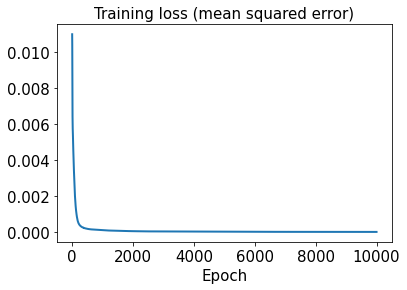

In [28]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

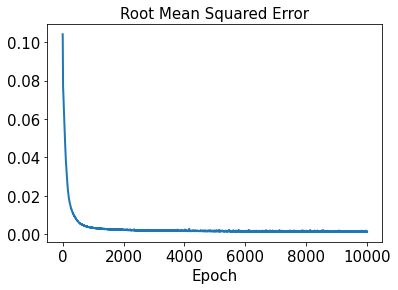

In [29]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [30]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 2ms/step - loss: 2.2546e-05 - rmse: 0.0000e+00


In [31]:
decoded_train = sd.predict(x_train)

In [32]:
decoded_test = sd.predict(x_test)

In [33]:
error_train_abs = np.abs(decoded_train - y_train)

In [34]:
error_test_abs = np.abs(decoded_test - y_test)

In [35]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00018900917


In [36]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.006213058


In [37]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [38]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

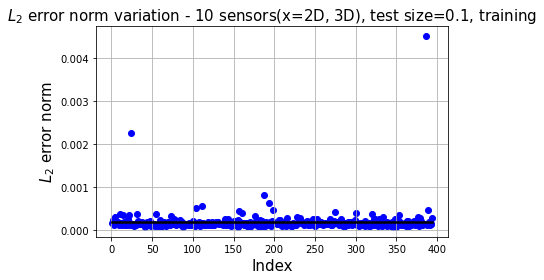

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 10 sensors(x=2D, 3D), test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

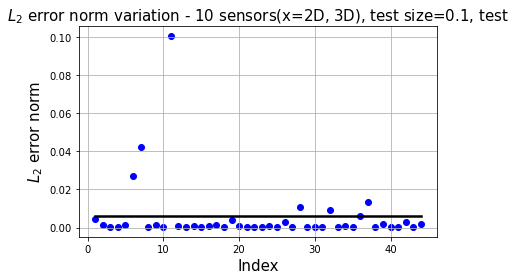

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 10 sensors(x=2D, 3D), test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

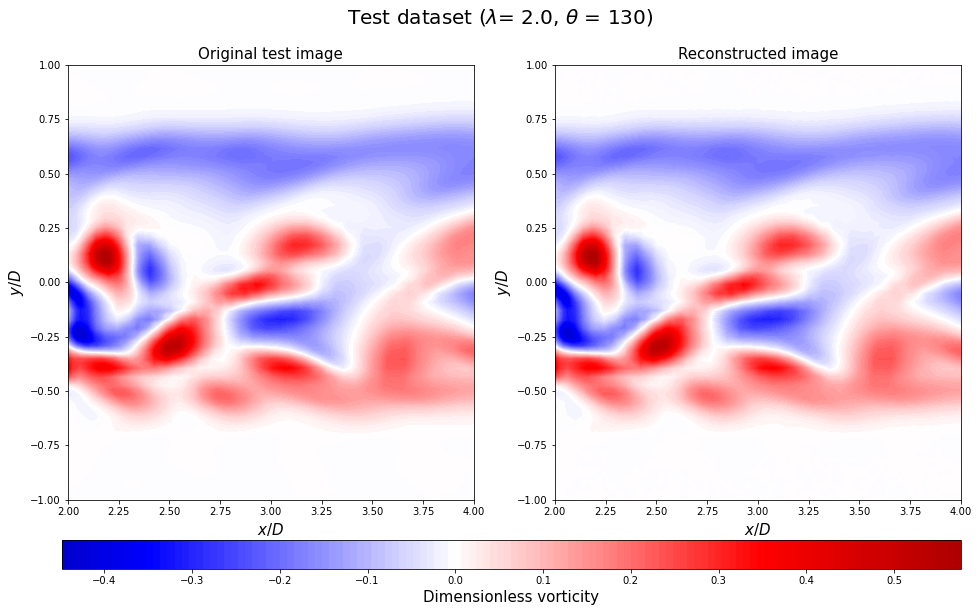

In [41]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

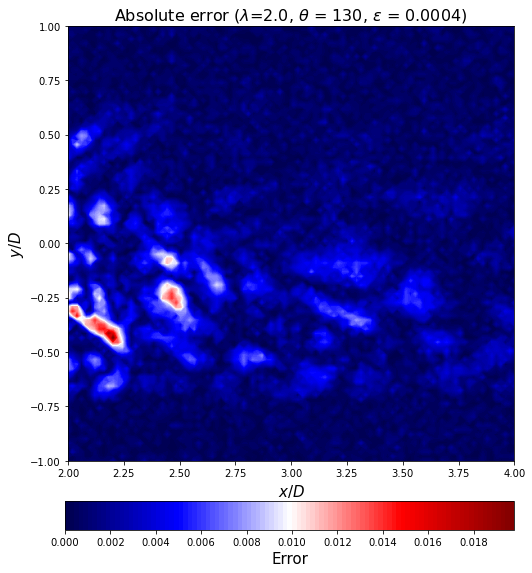

In [42]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()